In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [38]:
img = cv2.imread('./test_img/2.jpg')
img.shape

(2048, 2048, 3)

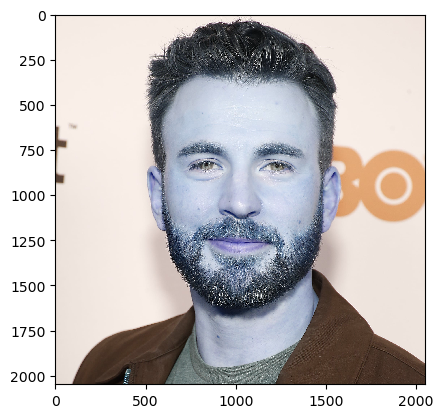

In [39]:
plt.imshow(img)

In [40]:
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape


(2048, 2048)

In [41]:
gray

array([[232, 232, 232, ..., 227, 227, 227],
       [232, 232, 232, ..., 227, 227, 227],
       [232, 232, 232, ..., 227, 227, 227],
       ...,
       [217, 217, 217, ...,  52,  50,  48],
       [217, 217, 217, ...,  54,  51,  50],
       [217, 217, 217, ...,  50,  48,  46]], dtype=uint8)

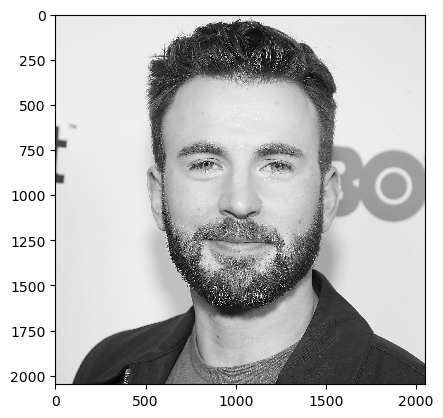

In [43]:
plt.imshow(gray, cmap='gray')

# Detecting the face

In [44]:
face_cascade = cv2.CascadeClassifier('./opencv_harcascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv_harcascade/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 429,  360, 1192, 1192]], dtype=int32)

In [45]:
(x,y,w,h) = faces[0]
x,y,w,h

(429, 360, 1192, 1192)

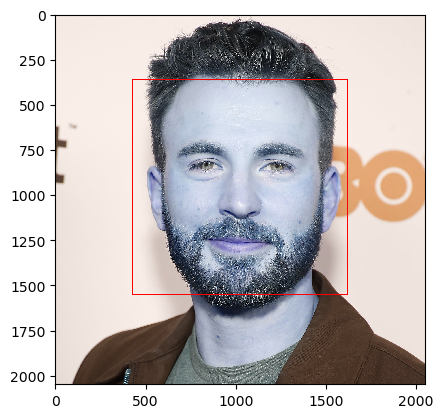

In [46]:
detect_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),4)
plt.imshow(detect_img)

In [47]:
roi_gray = gray[y:y+h, x:x+w]
roi_color = img[y:y+h, x:x+w]

In [48]:
eyes = eye_cascade.detectMultiScale(roi_gray)
eyes

array([[288, 355, 225, 225],
       [703, 388, 190, 190],
       [703, 918,  23,  23],
       [699, 908,  32,  32]], dtype=int32)

In [49]:
for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),4)

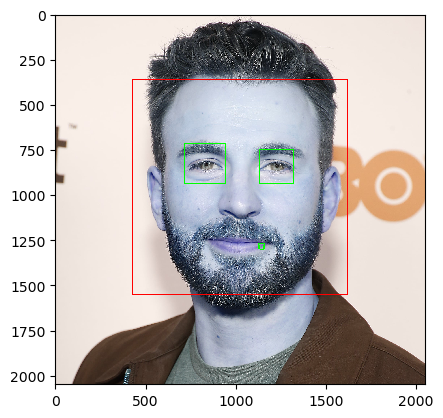

In [50]:
plt.imshow(img)

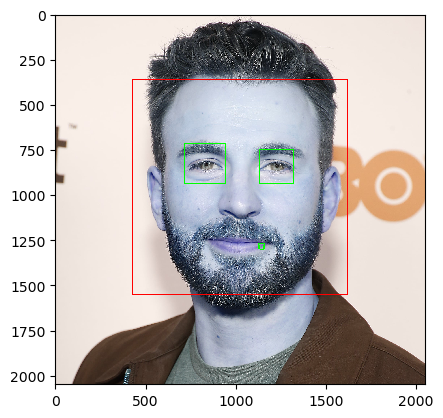

In [51]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),4)
    roigray = gray[y:y+h, x:x+w]
    roicolor = img[y:y+h, x:x+w]
        
    eye = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eye:
        cv2.rectangle(roicolor,(ex,ey),(ex+ew,ey+eh),(0,255,0),4)

plt.imshow(face_img, cmap='gray')

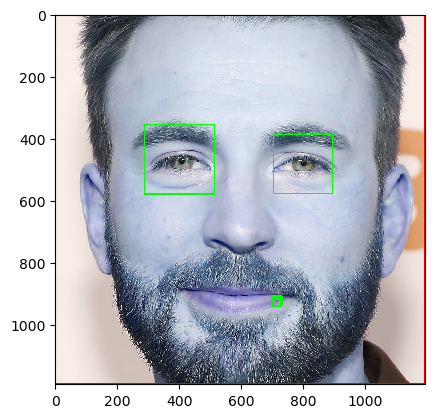

In [52]:
%matplotlib inline
plt.imshow(roicolor, cmap='gray')

In [62]:
def detect_img_and_eye(img_path):
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for(x,y,w,h) in faces:
        roigray = gray[y:y+h, x:x+w]
        roicolor = image[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roigray)
#         for (ex,ey,ew,eh) in eye:
#             cv2.rectangle(roicolor,(ex,ey),(ex+ew,ey+eh),(0,255,0),4)
        if len(eyes)>=2:
            return roicolor

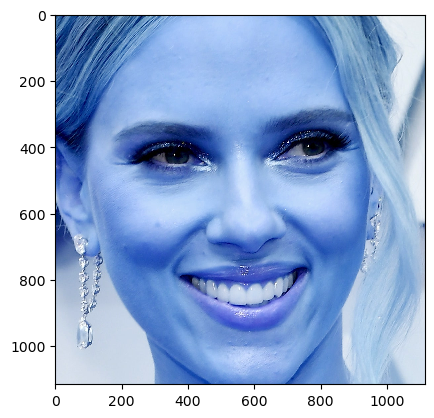

In [63]:
crop = detect_img_and_eye('./test_img/1.jpg')
plt.imshow(crop)

In [64]:
path_to_data = './datasets'
path_to_cr_data = './datasets/cropped/'

In [72]:
import os
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
    
img_loc = []
for item in os.scandir(path_to_data):
    if item.is_dir():
        img_loc.append(item.path)

In [73]:
img_loc

['./datasets/mark ruffalo',
 './datasets/chris evans',
 './datasets/robert downey jr',
 './datasets/elizabeth olsen',
 './datasets/scarlett johansson',
 './datasets/chris pratt',
 './datasets/tom holland',
 './datasets/chris hemsworth']

In [74]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [80]:
cropped_img_dir = []
celeb_names_dict = {}

for locs in img_loc:                          #iterating through each celebrity folder
    c=1
    name = locs.split('/')[-1]                #extracting name of celebrity
    
    celeb_names_dict[name] = []
    
    for item in os.scandir(locs):                  #iterating through each image in a folder
        roi_col = detect_img_and_eye(item.path)     #finding roi for each image
        if roi_col is not None:
            cropped_folder = path_to_cr_data + name       # defining location for the folders of cropped imgs
            if not os.path.exists(cropped_folder):        #checking if it already exists
                os.makedirs(cropped_folder)                # making the folder 
                cropped_img_dir.append(cropped_folder)
                
            file_name = name + str(c) + '.png'
            file_path = cropped_folder + '/' + file_name
            
            cv2.imwrite(file_path, roi_col)        #saving the image
            
            celeb_names_dict[name].append(file_path)
            
            c+=1